<a href="https://www.kaggle.com/code/himanshunakrani/bitcoin-price-prediction?scriptVersionId=104273790" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# import data

In [3]:
data = pd.read_csv('../input/cryptocurrencies-dataset/crypto_data_updated_11_august.csv')

In [4]:
data.head()

,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,09/11/2017,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,10/11/2017,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,11/11/2017,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,12/11/2017,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,13/11/2017,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


In [5]:
# data = data.drop(columns = ['Unnamed: 0'])

In [6]:
# data.head()

In [7]:
# data.to_csv('crypto prices.csv')

In [8]:
data

,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,09/11/2017,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,10/11/2017,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,11/11/2017,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,12/11/2017,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,13/11/2017,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984
...,...,...,...,...,...,...,...,...,...
1732,07/08/2022,322.92000,1012978419,23175.890000,15886817043,1.00010,29901528651,1699.350000,10252090340
1733,08/08/2022,324.80000,1318773332,23809.490000,28575544847,1.00020,50243147547,1775.520000,16841424404
1734,09/08/2022,324.91000,1139003043,23164.320000,23555719219,1.00020,46070684571,1703.030000,16368619692
1735,10/08/2022,328.47000,1738218767,23947.640000,32837431722,1.00030,60085173824,1851.740000,23512477984


# Exploratory Data Analysis

### Statistical Analysis

In [9]:
#check the shape of the dataframe
data.shape 

(1737, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1737 non-null   object 
 1   Adj Close (BNB)   1737 non-null   float64
 2   Volume (BNB)      1737 non-null   int64  
 3   Adj Close (BTC)   1737 non-null   float64
 4   Volume (BTC)      1737 non-null   int64  
 5   Adj Close (USDT)  1737 non-null   float64
 6   Volume (USDT)     1737 non-null   int64  
 7   Adj Close (ETH)   1737 non-null   float64
 8   Volume (ETH)      1737 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 122.3+ KB


In [11]:
data.isna().sum()

Date                0
Adj Close (BNB)     0
Volume (BNB)        0
Adj Close (BTC)     0
Volume (BTC)        0
Adj Close (USDT)    0
Volume (USDT)       0
Adj Close (ETH)     0
Volume (ETH)        0
dtype: int64

In [12]:
data.describe()

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
count,1737.000000,1.737000e+03,1737.000000,1.737000e+03,1737.000000,1.737000e+03,1737.000000,1.737000e+03
mean,135.716681,9.664122e+08,20204.957502,2.570310e+10,1.001710,4.088159e+10,1108.253688,1.290300e+10
std,185.731747,1.483718e+09,17473.016817,2.000088e+10,0.005917,3.906025e+10,1231.739023,1.103325e+10
min,1.510360,9.284000e+03,3236.761719,2.923670e+09,0.966644,3.581880e+08,84.308296,6.217330e+08
25%,13.699100,1.180335e+08,7466.859863,9.746200e+09,0.999971,4.749050e+09,204.044006,3.944040e+09
50%,22.277306,3.108467e+08,10346.760742,2.313454e+10,1.000595,3.363146e+10,441.721008,1.053610e+10
75%,290.341125,1.470899e+09,35501.953125,3.517204e+10,1.002830,6.078188e+10,1829.239258,1.826088e+10
max,675.684082,1.798295e+10,67566.828125,3.509679e+11,1.077880,2.790675e+11,4812.087402,8.448291e+10


### Visualization Analysis

<AxesSubplot:>

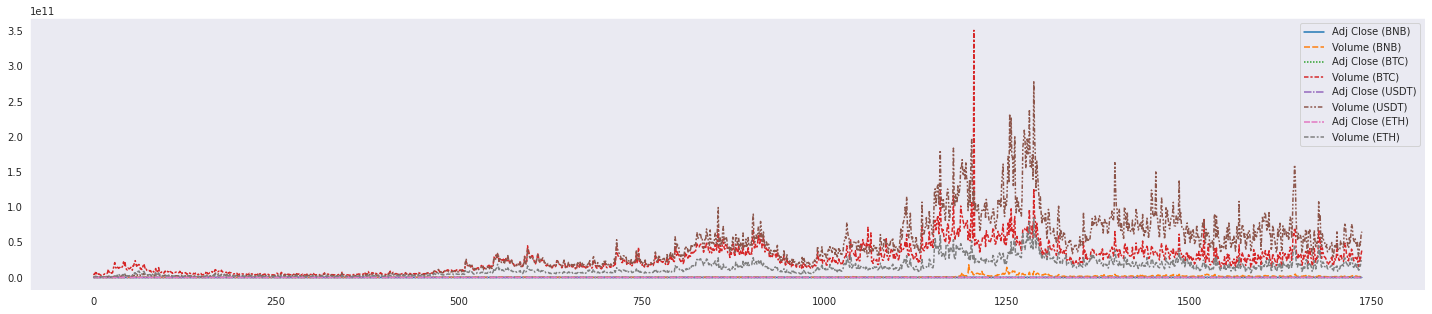

In [13]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

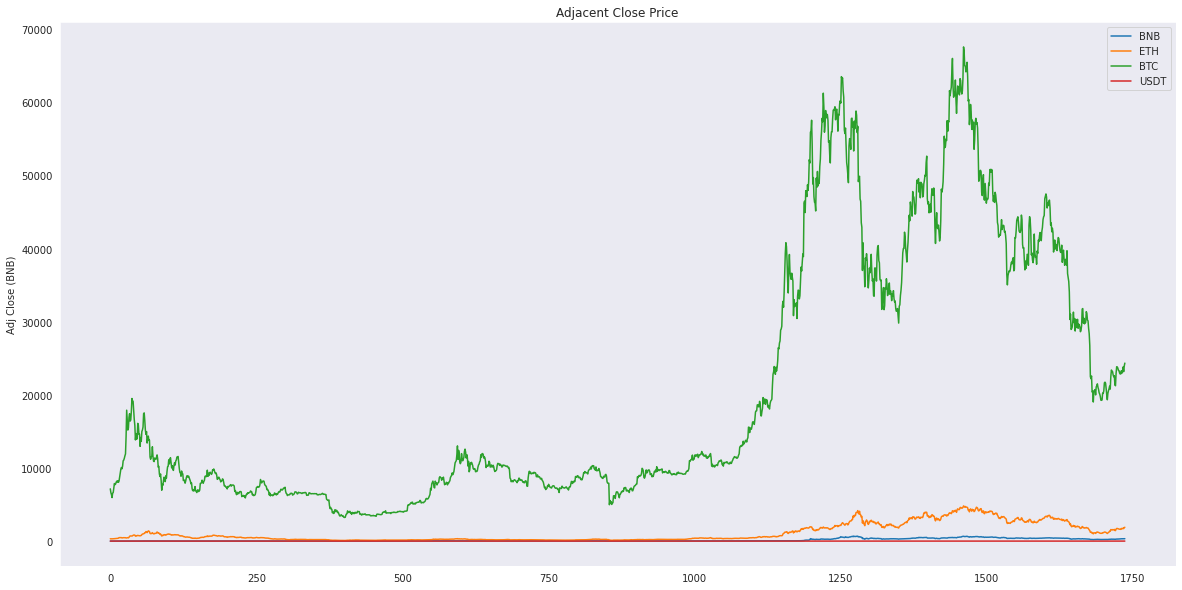

In [14]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Adj Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Adj Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Adj Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Adj Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

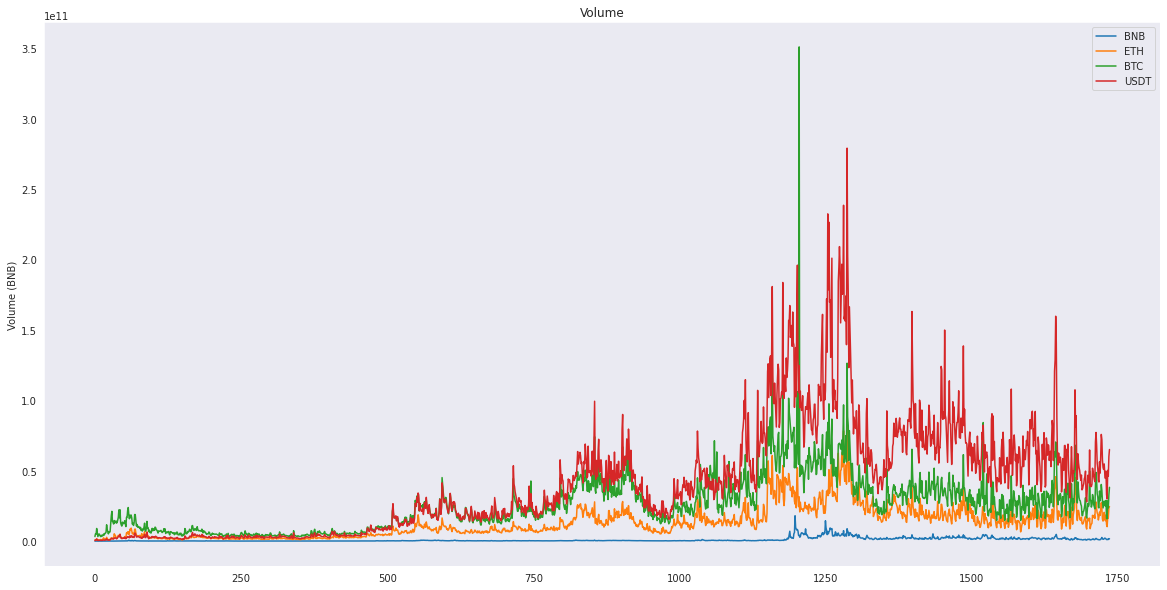

In [15]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

array([[<AxesSubplot:title={'center':'Adj Close (BNB)'}>,
        <AxesSubplot:title={'center':'Volume (BNB)'}>,
        <AxesSubplot:title={'center':'Adj Close (BTC)'}>,
        <AxesSubplot:title={'center':'Volume (BTC)'}>],
       [<AxesSubplot:title={'center':'Adj Close (USDT)'}>,
        <AxesSubplot:title={'center':'Volume (USDT)'}>,
        <AxesSubplot:title={'center':'Adj Close (ETH)'}>,
        <AxesSubplot:title={'center':'Volume (ETH)'}>]], dtype=object)

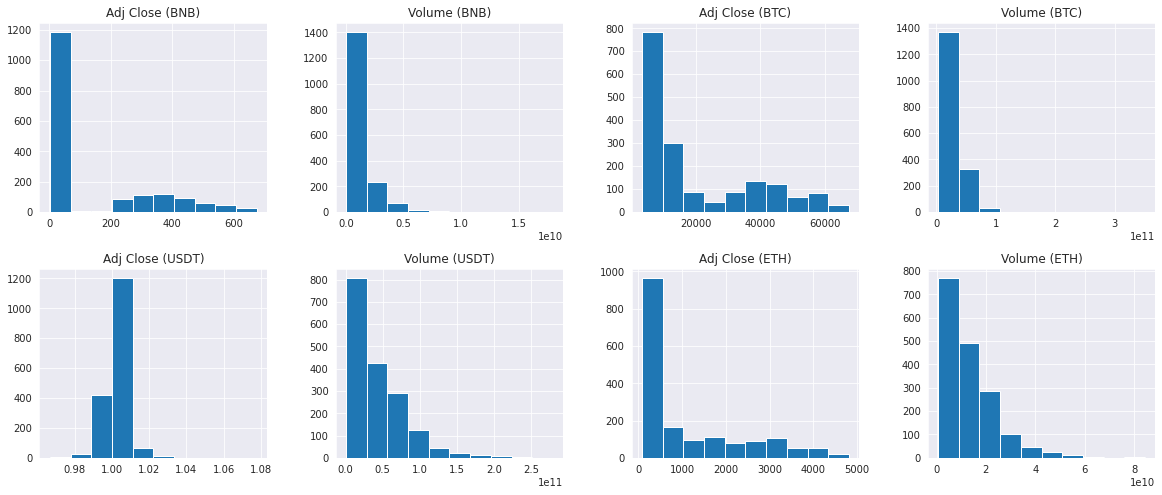

In [16]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

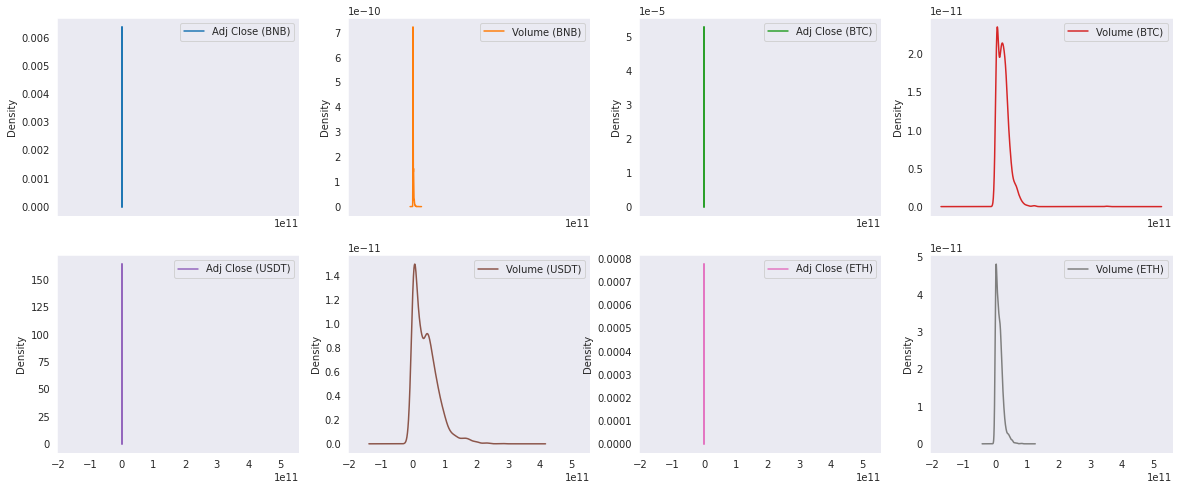

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

### checking for correlation

In [18]:
data.corr()

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Adj Close (BNB),1.000000,0.732164,0.917385,0.406405,-0.155361,0.658766,0.962045,0.570069
Volume (BNB),0.732164,1.000000,0.768152,0.600374,-0.117545,0.773452,0.654606,0.699269
Adj Close (BTC),0.917385,0.768152,1.000000,0.572902,-0.151705,0.773225,0.926781,0.672396
Volume (BTC),0.406405,0.600374,0.572902,1.000000,-0.095853,0.867522,0.383594,0.859791
Adj Close (USDT),-0.155361,-0.117545,-0.151705,-0.095853,1.000000,-0.140012,-0.150129,-0.119780
Volume (USDT),0.658766,0.773452,0.773225,0.867522,-0.140012,1.000000,0.629292,0.948032
Adj Close (ETH),0.962045,0.654606,0.926781,0.383594,-0.150129,0.629292,1.000000,0.545725
Volume (ETH),0.570069,0.699269,0.672396,0.859791,-0.119780,0.948032,0.545725,1.000000


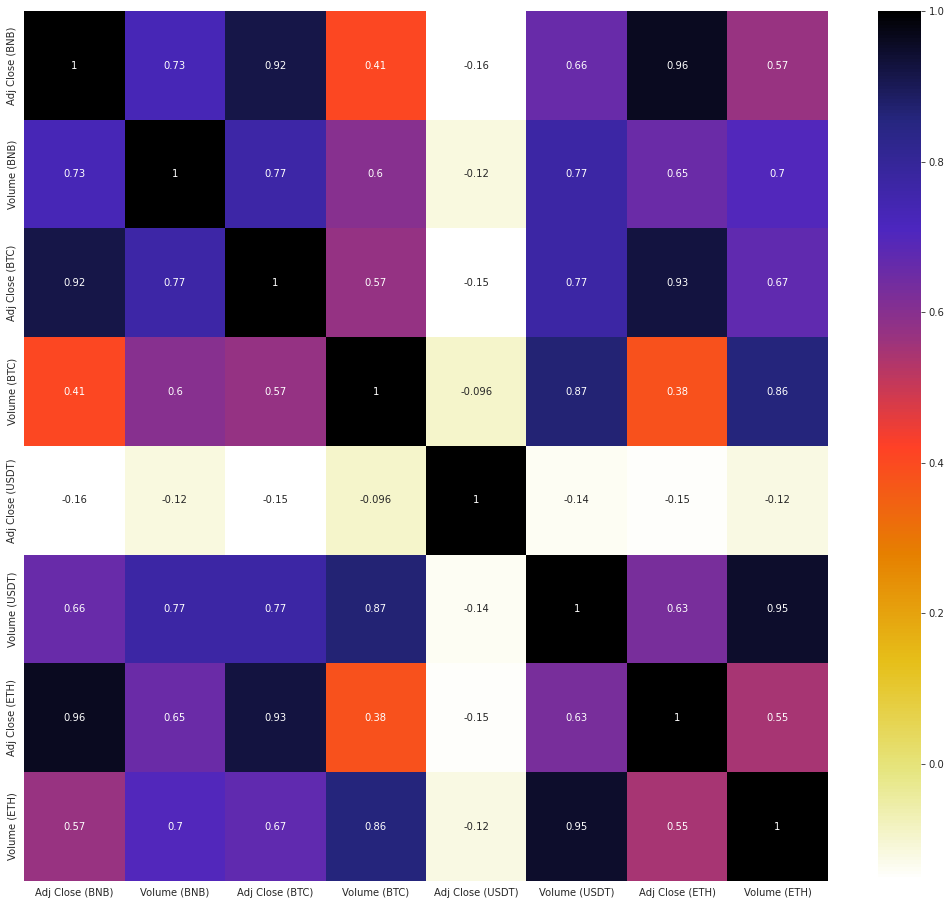

In [19]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

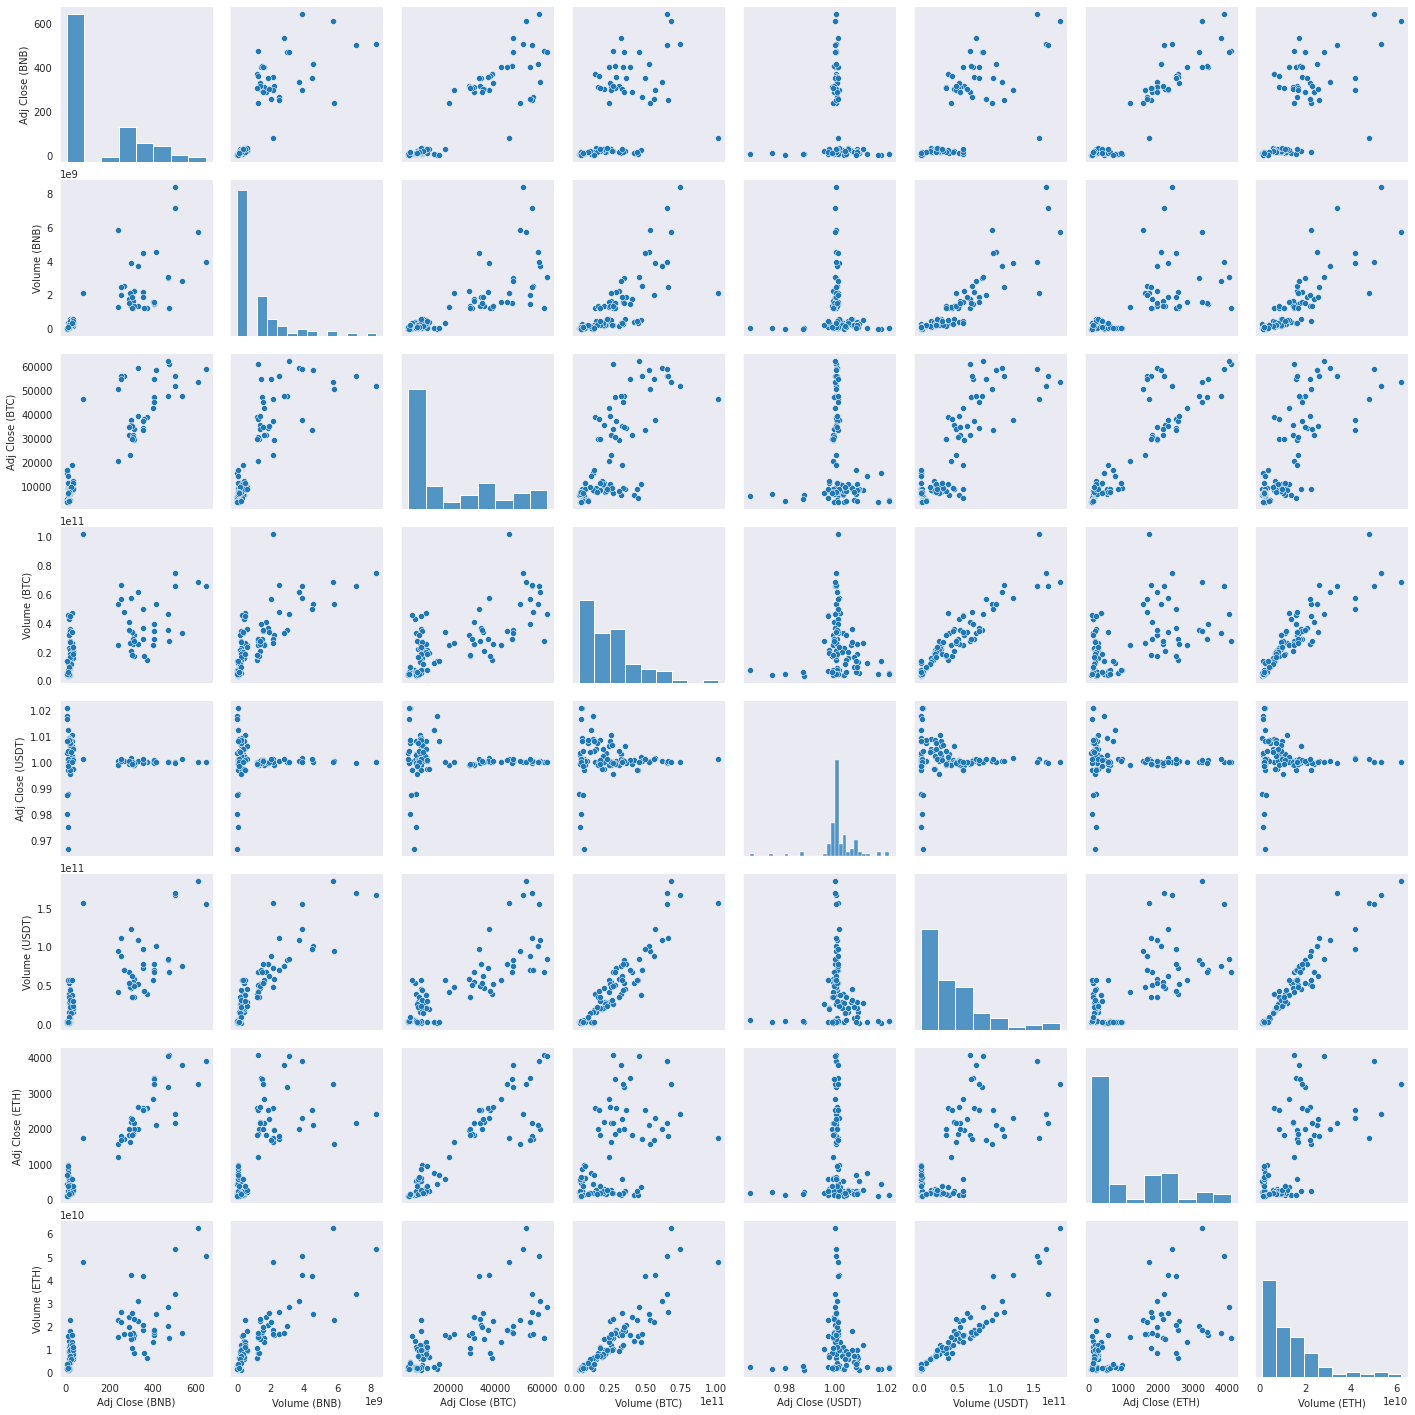

In [20]:
sns.pairplot(data.sample(n=100));

In [21]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

# data Pre-processing

In [22]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Adj Close (BTC)', 'Date'], axis = 1)
Y = data.loc[:, 'Adj Close (BTC)']

In [23]:
X.head()

,Adj Close (BNB),Volume (BNB),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,1.99077,19192200,3226249984,1.00818,358188000,320.884003,893249984
1,1.79684,11155000,5208249856,1.00601,756446016,299.252991,885985984
2,1.67047,8178150,4908680192,1.00899,746227968,314.681000,842300992
3,1.51969,15298700,8957349888,1.01247,1466060032,307.907990,1613479936
4,1.68662,12238800,6263249920,1.00935,767884032,316.716003,1041889984


In [24]:
Y.head()

0    7143.580078
1    6618.140137
2    6357.600098
3    5950.069824
4    6559.490234
Name: Adj Close (BTC), dtype: float64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [26]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Selection

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BaseLine Modeling




In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [33]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [34]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [35]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9627318806604628
------------------------------
------------------------------
random forest:  0.9709598721761737
------------------------------
------------------------------
decision tree:  0.9442194487596033
------------------------------
------------------------------
gradient boosting:  0.9638492732238352
------------------------------


result: random forest gives the highest accuracy.

In [36]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_test.index, y = Y_pred, label = "Predicted Price")
# sns.lineplot(x = X_test.index, y = Y_test, label = "Actual Price")
# plt.title('Actual vs Predicted values in test data')

In [37]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
# sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
# plt.title('Actual vs Predicted values in training data')

# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [39]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [40]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 170,
 'bootstrap': True}

# Model Evaluation (performance analysis)

In [41]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9666170664009909
------------------------------
